In [13]:
# %matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import copy

In [14]:
def get_line_function(x1, x2, w1, w2, w3, w4, w5, b):
    return w1 + w1*x1 + w2*x1**2 + w3*x1**2*x2 + w4*x2**3 + w5*x1**4 + b

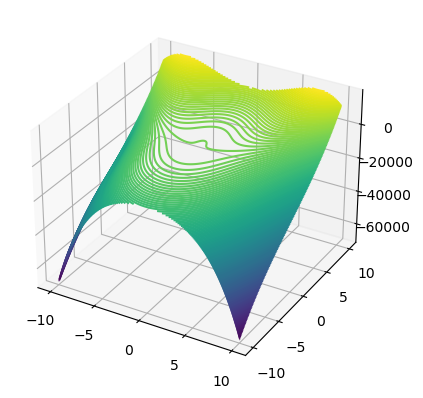

In [15]:
# Example model parameters
w1 = 2
w2 = 14
w3 = 32
w4 = 9
w5 = -3
b = -10

x1 = np.linspace(-10, 10, 300)
x2 = np.linspace(-10, 10, 300)
x1, x2= np.meshgrid(x1, x2)

z = get_line_function(x1, x2, w1, w2, w3, w4, w5, b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x1, x2, z, 200)

plt.show()

In [16]:
def sigmoid(z):
    z = np.clip(z, -500, 500) # protect against overflow
    g = 1.0/(1.0+np.exp(-z))   
    return g

In [17]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    
    for i in range(m):
        z = get_line_function(X[i][0], X[i][1], w[0], w[1], w[2], w[3], w[4], b)
        f_x_i = sigmoid(z)
        cost += y[i] * np.log(f_x_i) + (1 - y[i]) * np.log(1 - f_x_i)
    cost = cost / (-1*m)
    return cost

In [18]:
def compute_grad(X, y, w, b, lambda_=0):
    m, _ = X.shape # m - count of input row, n - count of x columns
    n = w.shape[0]
    dj_dw = np.zeros((n, ))
    dj_db = 0.0
    
    for i in range(m):
        f_x_i = sigmoid(get_line_function(X[i][0], X[i][1], w[0], w[1], w[2], w[3], w[4], b))
        err = f_x_i - y[i]
        dj_dw[0] += err * X[i, 0]
        dj_dw[1] += err * X[i, 0]**2
        dj_dw[2] += err * X[i, 0]**2 * X[i, 1] 
        dj_dw[3] += err * X[i, 1]**3
        dj_dw[4] += err * X[i, 0]**4 
        # dj_dw[0] += err * X[i, 0]
        # dj_dw[1] += err * X[i, 0]
        # dj_dw[2] += err * X[i, 0] * X[i, 1] 
        # dj_dw[3] += err * X[i, 1]
        # dj_dw[4] += err * X[i, 0]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    if lambda_ != 0:
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
        
    return dj_dw, dj_db

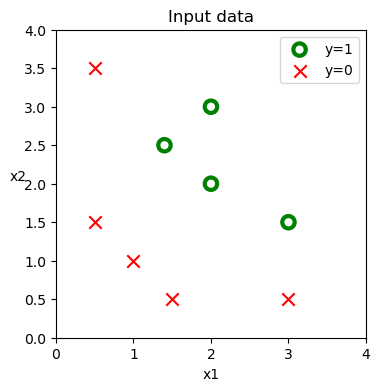

In [19]:
X = np.array([[0.5, 3.5], [0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1.4, 2.5], [2, 3], [3, 1.5]])  #(m,n)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])
pos = y == 1
neg = y == 0

_, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.title('Input data')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.axis([0, 4, 0, 4])
ax.legend(loc='best')
plt.show()

In [20]:
w_init =np.random.randint(15, size=5).astype(np.float64)
b_init = -13

alpha = 0.05
lambda_tmp = 0.7
epochs = 1000

In [21]:
cost_history = []
model_history = []

w = copy.deepcopy(w_init)
b = copy.deepcopy(b_init)

for i in range(epochs):
    dj_dw, dj_db = compute_grad(X, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    
    cost_history.append(compute_cost(X, y, w, b))
    model_history.append([w, b])
    
    # if i% math.ceil(epochs / 10) == 0:
    #     print(f"Iteration {i:4d}: Cost {cost_history[-1]}")

# plt.plot(cost_history)

print(f'Minimum cost: {cost_history[-1]:.4f}')
print('Best params: {w1:.3f}.x1, {w2:.3f}.x2 + ({b:.3f})'.format(w1=model_history[-1][0][0], w2=model_history[-1][0][1], b=model_history[-1][1]))


Minimum cost: nan
Best params: 1.423.x1, 5.336.x2 + (-18.554)


C:\Users\baksa\AppData\Local\Temp\ipykernel_18588\180047964.py:8: RuntimeWarning: divide by zero encountered in log
  cost += y[i] * np.log(f_x_i) + (1 - y[i]) * np.log(1 - f_x_i)
C:\Users\baksa\AppData\Local\Temp\ipykernel_18588\180047964.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  cost += y[i] * np.log(f_x_i) + (1 - y[i]) * np.log(1 - f_x_i)


In [22]:
cost_history_regularized = []
model_history_regularized = []

w = copy.deepcopy(w_init)
b = copy.deepcopy(b_init)

for i in range(epochs):
    dj_dw, dj_db = compute_grad(X, y, w, b, lambda_tmp)
    
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    
    cost_history_regularized.append(compute_cost(X, y, w, b))
    model_history_regularized.append([w, b])
    
    # if i% math.ceil(epochs / 10) == 0:
    #     print(f"Iteration {i:4d}: Cost {cost_history_regularized[-1]}")

# plt.plot(cost_history_regularized)

print(f'Minimum cost: {cost_history_regularized[-1]:.4f}')
print('Best params: {w1:.3f}.x1, {w2:.3f}.x2 + ({b:.3f})'.format(w1=model_history_regularized[-1][0][0], w2=model_history_regularized[-1][0][1], b=model_history_regularized[-1][1]))


C:\Users\baksa\AppData\Local\Temp\ipykernel_18588\180047964.py:8: RuntimeWarning: divide by zero encountered in log
  cost += y[i] * np.log(f_x_i) + (1 - y[i]) * np.log(1 - f_x_i)
C:\Users\baksa\AppData\Local\Temp\ipykernel_18588\180047964.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  cost += y[i] * np.log(f_x_i) + (1 - y[i]) * np.log(1 - f_x_i)


Minimum cost: 0.0553
Best params: 0.521.x1, 0.752.x2 + (-14.471)


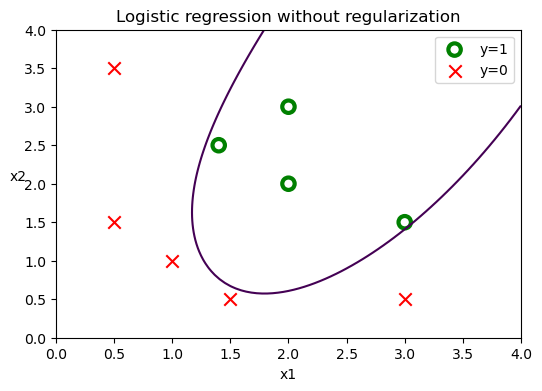

In [23]:
# Model parameters
w, b = model_history[-1]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.zeros(xx.shape)

Z = get_line_function(xx, yy, w[0], w[1], w[2], w[3], w[4], b)

_, ax = plt.subplots(1,1,figsize=(6,4))

ax.contour(xx, yy, Z, levels=[0])
ax.axis([0, 4, 0, 4])

# Plot the input data
plt.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.title('Input data')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.legend(loc='best')

plt.title("Logistic regression without regularization")
plt.show()

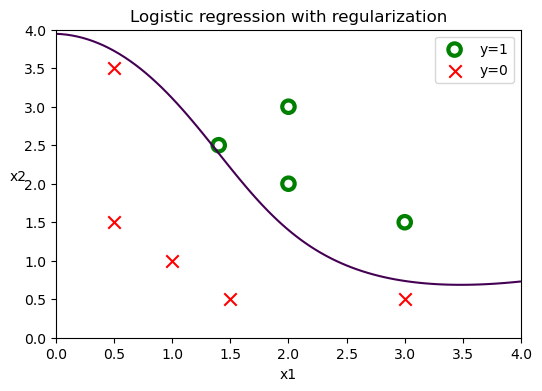

In [24]:
# Model parameters
w, b = model_history_regularized[-1]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.zeros(xx.shape)

Z = get_line_function(xx, yy, w[0], w[1], w[2], w[3], w[4], b)

_, ax = plt.subplots(1,1,figsize=(6,4))

ax.contour(xx, yy, Z, levels=[0])
ax.axis([0, 4, 0, 4])

# Plot the input data
plt.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.title('Input data')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.legend(loc='best')

plt.title("Logistic regression with regularization")
plt.show()